# THỰC HÀNH DECISION TREE - RANDOM FOREST

## Bài toán: Đánh giá điểm tín dụng sử dụng Decision Tree và Random Forest

## Mục tiêu:
- Xây dựng mô hình Decision Tree và Random Forest sử dụng thư viện sklearn.
- Áp dụng hai mô hình để giải bài toán thực tế (đánh giá điểm tín dụng).
- Sử dụng độ đo thích hợp để đánh giá chất lượng mô hình.
## Vấn đề:
- Trong lĩnh vực tài chính, bài toán đánh giá tín dụng của người dùng là bài toán phổ biến
và quan trọng. Ở đó, ngân hàng sẽ xác định liệu có cho một người dùng nào đó thực hiện
khoản vay hay không, dựa trên thông tin về điểm tín dụng. Điểm tín dụng chính là con số
phản ánh khả năng hoàn trả của người vay. Nhìn chung, đây là một bài toán phân lọai 2 lớp
(good/bad score).

- Ngoài ra, một vấn đề thường gặp phải trong bài toán này đó: số lượng bad credits thường ít
hơn nhiều so với số lượng good credits => Dữ liệu nhãn lớp mất cân bằng.

## Dữ liệu:
- Cho dưới dạng bảng, mỗi hàng là một cá nhân vay, mỗi cột thể hiện một thuộc tính của cá
nhân đó.
- Các trường thuộc tính tồn tại ở nhiều dạng: categorical, numeric (discrete / continuous).
Thậm chí tên trường có thể được ẩn đi, hay giá trị thật sự được mã hõa để đảm bảo tính bảo
mật của khách hàng.
- Hai tập dữ liệu sẽ sử dụng:
German credit và Australian
credit

## Mô hình hóa bài toán: 
Bài toán phân loại nhị phân:
- Đâu vào: 𝑁 vector 𝐷 chiều (ma trận cỡ 𝑁 ×𝐷), tương ứng 𝑁 cá thể với 𝐷 thuộc tính.
- Đầu ra: nhãn 0−1 (0: bad credit, 1: good credit)

## Bước 1 - Import các thư viện cần thiết

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
random_state = 42

## Bước 2 - Tìm hiểu dữ liệu

In [3]:
data_path = '../data/german.data-numeric'
credit = np.genfromtxt(data_path)
print(credit)
X,y = credit[:,:-1], credit[:,-1]
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

[[ 1.  6.  4. ...  0.  1.  1.]
 [ 2. 48.  2. ...  0.  1.  2.]
 [ 4. 12.  4. ...  1.  0.  1.]
 ...
 [ 4. 12.  2. ...  0.  1.  1.]
 [ 1. 45.  2. ...  0.  1.  2.]
 [ 2. 45.  4. ...  0.  1.  1.]]
(1000, 24) (1000,)
(800, 24) (200, 24)


## Bước 3 - Khởi tạo các mô hình Decision Tree - Random Forest

In [4]:
DT = DecisionTreeClassifier(random_state=random_state)
RF = RandomForestClassifier(random_state=random_state)

### 3.1. Chạy Decision Tree baseline

In [5]:
print('Demo DT and RF prediction')
DT.fit(X_train, y_train)
y_dt_pred = DT.predict(X_test)
print("-DT acc = {}".format(accuracy_score(y_test, y_dt_pred)))
print("-DT f1 = {}".format(f1_score(y_test, y_dt_pred)))
print("-DT roc auc = {}".format(roc_auc_score(y_test, y_dt_pred)))
print(confusion_matrix(y_test, y_dt_pred))

Demo DT and RF prediction
-DT acc = 0.665
-DT f1 = 0.7632508833922261
-DT roc auc = 0.5948431301839163
[[108  33]
 [ 34  25]]


### 3.2. Chạy RF baseline

In [6]:
# code
RF.fit(X_train, y_train)
y_dt_pred = RF.predict(X_test)
print("-DT acc = {}".format(accuracy_score(y_test, y_dt_pred)))
print("-DT f1 = {}".format(f1_score(y_test, y_dt_pred)))
print("-DT roc auc = {}".format(roc_auc_score(y_test, y_dt_pred)))
print(confusion_matrix(y_test, y_dt_pred))

-DT acc = 0.81
-DT f1 = 0.875
-DT roc auc = 0.7173939175381656
[[133   8]
 [ 30  29]]


## Bước 4 - Tìm kiếm siêu tham số

### 4.1. Khai báo một số hàm hỗ trợ

In [ ]:
def grid_search(algorithm, n_jobs, dict_param):
    if algorithm == 'decision-tree':
        model = DecisionTreeClassifier()
    if algorithm == 'random-forest':
        model = RandomForestClassifier()

    classifier = GridSearchCV(
        estimator=model, cv=5, param_grid=dict_param,
        n_jobs=n_jobs, scoring='f1'
    )

    classifier.fit(X_train, y_train)
    print('Best model', end='')
    print(classifier.best_estimator_)
    return classifier.best_estimator_


def evaluate(model):
    print("Train Accuracy :", accuracy_score(y_train, model.predict(X_train)))
    print("Train f1 score :", f1_score(y_train, model.predict(X_train)))
    print("Train roc auc :", roc_auc_score(y_train, model.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, model.predict(X_test)))
    print("Test f1 score :", f1_score(y_test, model.predict(X_test)))
    print("Test roc auc :", roc_auc_score(y_test, model.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, model.predict(X_test)))


def plot_learning_curve(estimator, title, label_curve, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.1, 1.0, 5), new_plot=False, idx_color=0):

# Khởi tạo bức ảnh mới với thư viện plot lib
    if new_plot:
        # plt.figure()
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.grid()
    # Chú thích nếu có
    if ylim is not None:
        plt.ylim(*ylim)

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, 
        train_sizes=train_sizes, scoring="f1"
    )

    # Lấy trung bình kết quả trên k-fold
    # train_scores: mỗi hàng đánh dấu số mẫu, mỗi cột thể hiện f1 score của từng fold
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    # Thực hiện vẽ các giá trị số lên đồ thị với màu vừa được random
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
    label=label_curve['test'])

    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
    label=label_curve['train'])
    
    plt.legend(loc="best")

    plt.xlabel('Number of examples')
    plt.ylabel('F1 Score')
    return plt

### 4.2. Phân tích Decision Tree

Text(0.5, 1.0, 'DT validation curve for max_depth')

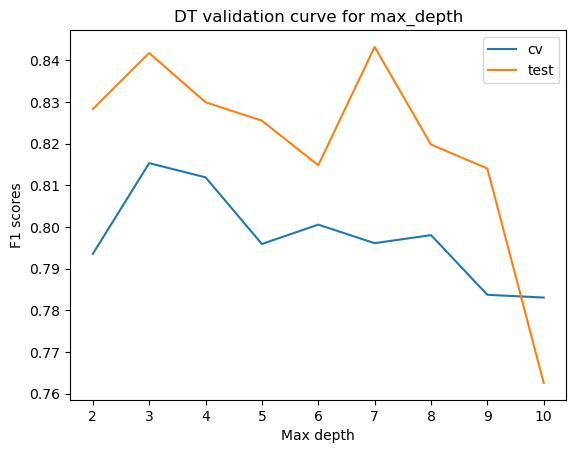

In [27]:
# Trước hết, hãy thử khảo sát DT với tham số max_depth
cv_accuracies_by_depth, test_accuracies_by_depth= [], []
max_depth_values= np.arange(2,11)

for curr_max_depth in max_depth_values:
    tree = DecisionTreeClassifier(random_state=random_state, max_depth=curr_max_depth)

    # cross-validation
    val_scores= cross_val_score(estimator=tree, X=X_train, y=y_train, cv=5, scoring='f1')
    cv_accuracies_by_depth.append(val_scores.mean())
    # Test
    tree.fit(X_train, y_train)
    curr_pred= tree.predict(X_test)
    test_accuracies_by_depth.append(f1_score(curr_pred, y_test))
    
# Plot
plt.plot(max_depth_values, cv_accuracies_by_depth, label='cv')
plt.plot(max_depth_values, test_accuracies_by_depth, label='test')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('F1 scores')
plt.title('DT validation curve for max_depth')

### 4.3. Dùng GridSearch để kiểm chứng lại

In [28]:
# Thử sử dụng GridSearchCV để khảo sát
dict_param = {
'max_depth': [2, 3, 5, 7, 10, 20],
'min_samples_leaf': [5, 10, 20, 50, 100],
'criterion': ["gini", "entropy"]
}
best_tree = grid_search('decision-tree', n_jobs=-1, dict_param=dict_param)

Best modelDecisionTreeClassifier(max_depth=5, min_samples_leaf=20)


### 4.4. Đánh giá best tree

Train Accuracy : 0.77125
Train f1 score : 0.8473728106755629
Train roc auc : 0.680523905314024
Train Confusion Matrix:
[[508  51]
 [132 109]]
--------------------------------------------------
Test Accuracy : 0.78
Test f1 score : 0.8533333333333334
Test roc auc : 0.6911888448130785
Test Confusion Matrix:
[[128  13]
 [ 31  28]]


<module 'matplotlib.pyplot' from 'c:\\Users\\DELL\\.conda\\envs\\course\\Lib\\site-packages\\matplotlib\\pyplot.py'>

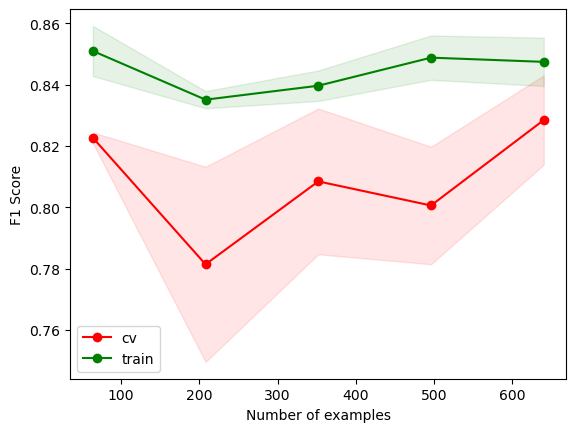

In [29]:
# code
best_tree.fit(X_train, y_train)
evaluate(best_tree)
title = 'Learning curve with best tree'
label_curve = {'train': 'train', 'test':'cv'}
plot_learning_curve(best_tree, title, label_curve, X_train, y_train, cv=5)

### 4.5. Nhận xét độ quan trọng của từng đặc trưng

Top 10 feature importances:
Feature  0 - 0.40445005922715943
Feature  1 - 0.17066428015343657
Feature  2 - 0.14261352910286315
Feature  3 - 0.07120344185816782
Feature  4 - 0.05428847945598893
Feature  5 - 0.05400258515142507
Feature  6 - 0.04007488290946428
Feature  7 - 0.03813781829612112
Feature  8 - 0.015091674891623292
Feature  9 - 0.009473248953750433


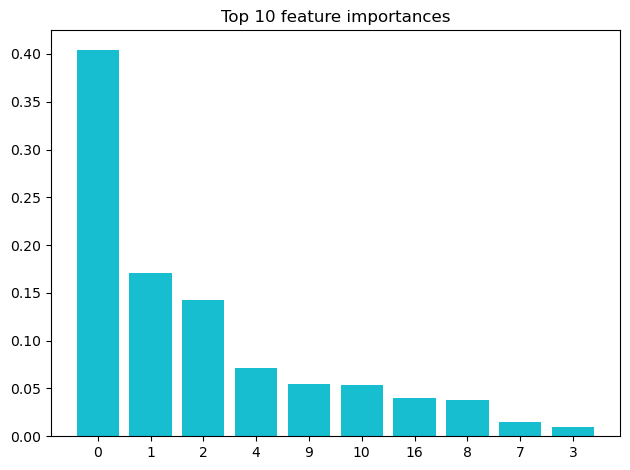

In [30]:
# Nhận xét về độ quan trọng của từng feature
importances = best_tree.feature_importances_
indices = np.argsort(importances)[::-1]
print('Top 10 feature importances:')

for i in range(10):
    print('Feature ', i, '-', importances[indices[i]])
    indices = indices[:10]
    plt.title('Top 10 feature importances')
    plt.tight_layout()
    if plt.bar is not None:
        plt.bar(range(10), importances[indices])
        plt.xticks(range(10), indices)


## Bước 5 - Thực hành với Random Forest (RF)

### 5.1. Khảo sát RF với số lượng cây n-estimators

Text(0.5, 1.0, 'Random-Forest: scores vs n_estimators')

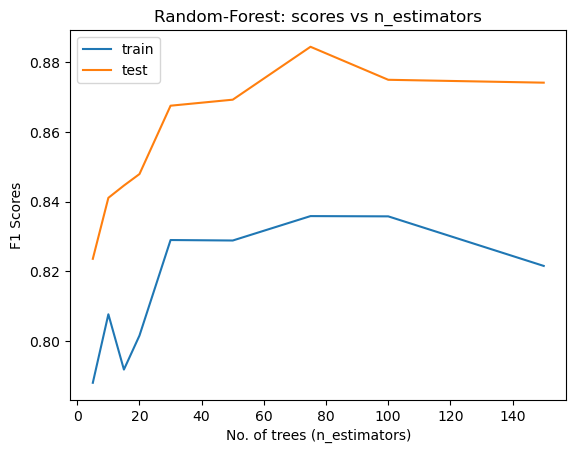

In [31]:
num_trees = [5, 10, 15, 20, 30, 50, 75, 100, 150]
train_acc = []
test_acc = []

for ntrees in num_trees:
    rf = RandomForestClassifier(
        n_estimators=ntrees, random_state=random_state, n_jobs=-1
    ).fit(X_train, y_train)

    temp_train_acc=cross_val_score(rf, X_test, y_test, cv=5, scoring='f1')
    train_acc.append(temp_train_acc.mean())
    test_acc.append(f1_score(rf.predict(X_test), y_test))

plt.plot(num_trees, train_acc, label='train')
plt.plot(num_trees, test_acc, label='test')
plt.legend()
plt.xlabel('No. of trees (n_estimators)')
plt.ylabel('F1 Scores')
plt.title('Random-Forest: scores vs n_estimators')

### 5.2. Tìm siêu tham số tốt nhất

Best modelRandomForestClassifier(max_depth=24, max_features=10, min_samples_leaf=7,
                       n_estimators=75)
Train Accuracy : 0.86375
Train f1 score : 0.9087866108786611
Train roc auc : 0.7927426717834902
Train Confusion Matrix:
[[543  16]
 [ 93 148]]
--------------------------------------------------
Test Accuracy : 0.79
Test f1 score : 0.8636363636363636
Test roc auc : 0.6834956124534199
Test Confusion Matrix:
[[133   8]
 [ 34  25]]


<module 'matplotlib.pyplot' from 'c:\\Users\\DELL\\.conda\\envs\\course\\Lib\\site-packages\\matplotlib\\pyplot.py'>

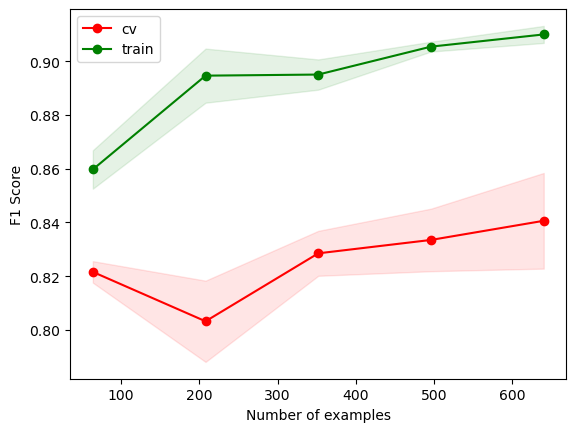

In [32]:
# Sử dụng GridSearch CV
dict_param = {
'max_depth': [3, 11, 15, 24, 27],
'min_samples_leaf': [1, 5, 7, 9, 15, 24],
'max_features': [4, 6, 10, 16],
'n_estimators': [75]
}
# Bài tập:
#- tìm best_forest
#- Đánh giá best_forest
#- Vẽ learning curve
#- Tìm hiểu feature importance
# Code
#- Tìm best_forest
best_forest = grid_search('random-forest', n_jobs=-1, dict_param=dict_param)
# Đánh giá best rf
# code
best_forest.fit(X_train, y_train)
evaluate(best_forest)
title = 'Learning curve with best forest'
label_curve = {'train': 'train', 'test':'cv'}
plot_learning_curve(best_forest, title, label_curve, X_train, y_train, cv=5)


### 5.3. Đánh giá feature importances

Top 10 feature importances:
Feature  0 - 0.19448428700198206
Feature  1 - 0.13782018803058219
Feature  2 - 0.11050002211786476
Feature  3 - 0.10028894407566288
Feature  4 - 0.0959595280717248
Feature  5 - 0.05110463758791177
Feature  6 - 0.04708111105754769
Feature  7 - 0.041577377491294545
Feature  8 - 0.0315807655510293
Feature  9 - 0.0309716464195749


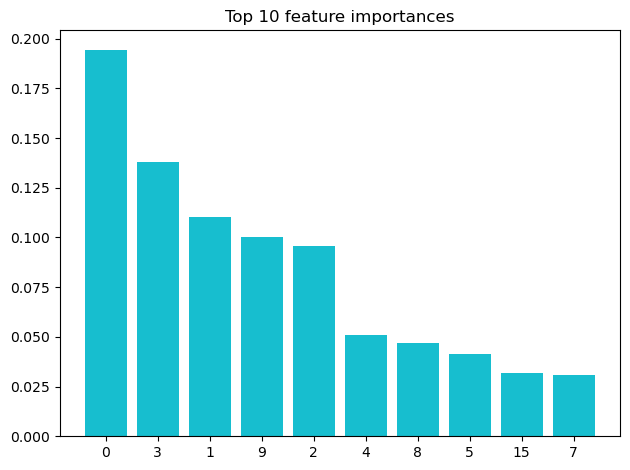

In [33]:
# Nhận xét về độ quan trọng của từng feature
importances = best_forest.feature_importances_
indices = np.argsort(importances)[::-1]
print('Top 10 feature importances:')

for i in range(10):
    print('Feature ', i, '-', importances[indices[i]])
    indices = indices[:10]
    plt.title('Top 10 feature importances')
    plt.tight_layout()
    if plt.bar is not None:
        plt.bar(range(10), importances[indices])
        plt.xticks(range(10), indices)


## Bước 6 - Thử nghiệm bổ sung

### 6.1. Bỏ một số đặc trưng có độ quan trọng thấp

In [ ]:
params = {
'max_depth': best_forest.get_params()['max_depth'],
'max_features': best_forest.get_params()['max_features'],
'min_samples_leaf': best_forest.get_params()['min_samples_leaf'],
'n_estimators': best_forest.get_params()['n_estimators'],
}

acc test 0.795
f1 score test 0.8673139158576052
roc_auc test 0.6870417117442


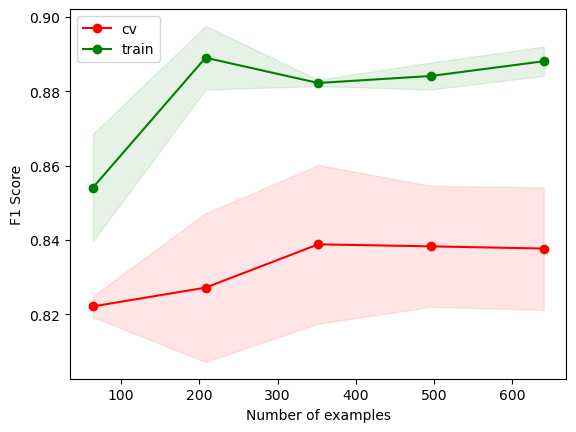

In [ ]:
# Thử bỏ một sô feature có độ quan trọng thấp đi
# Chú ý tham max_features cần thay đổi
# Tự động chọn feature dựa trên importances, chỉ giữ lại các feature có importance >= mean
sfm = SelectFromModel(best_forest, threshold='mean')
sfm.fit(X_train, y_train)
# Loại bỏ các feature có importance thấp
X_train_dropped = sfm.transform(X_train)
X_test_dropped = sfm.transform(X_test)

title = 'Learning with dropped features'
label_curve = {'train': 'train', 'test':'cv'}

forest_dropped = RandomForestClassifier(
    max_depth=params['max_depth'], min_samples_leaf=params['min_samples_leaf'],
    n_estimators=params['n_estimators'], n_jobs=-1, random_state=random_state
)

plot_learning_curve(forest_dropped, title, label_curve, X_train_dropped, y_train, cv=5)
forest_dropped.fit(X_train_dropped, y_train)
y_dropped_pred = forest_dropped.predict(X_test_dropped)

print('acc test', accuracy_score(y_test, y_dropped_pred))
print('f1 score test', f1_score(y_test, y_dropped_pred))
print('roc_auc test', roc_auc_score(y_test, y_dropped_pred))

### 6.2. Một số chiến lược áp dụng cho RF khi gặp phải class imbalance

#### 6.2.1. Standard RF

In [ ]:
evaluate(best_forest)

Train Accuracy : 0.86375
Train f1 score : 0.9087866108786611
Train roc auc : 0.7927426717834902
Train Confusion Matrix:
[[543  16]
 [ 93 148]]
--------------------------------------------------
Test Accuracy : 0.79
Test f1 score : 0.8636363636363636
Test roc auc : 0.6834956124534199
Test Confusion Matrix:
[[133   8]
 [ 34  25]]


#### 6.2.2. RF with class weighting

Ý nghĩa tham số class_weight='balanced':
- Tự động gán trọng số lớn hơn cho các mẫu của lớp hiếm và nhỏ hơn cho lớp phổ biến
- Công thức gán trọng số:

$$w_c=\frac{N}{K \times N_c}$$

Trong đó:
- $N$ là tổng số mẫu
- $K$ là tổng số lớp
- $N_c$ là số mẫu của lớp c

In [36]:
rf1 = RandomForestClassifier(
    max_depth=params['max_depth'], max_features=params['max_features'], 
    min_samples_leaf = params['min_samples_leaf'], n_estimators=params['n_estimators'],
    class_weight='balanced'
)

rf1.fit(X_train, y_train)
evaluate(rf1)

Train Accuracy : 0.86
Train f1 score : 0.895910780669145
Train roc auc : 0.8585129046385439
Train Confusion Matrix:
[[482  77]
 [ 35 206]]
--------------------------------------------------
Test Accuracy : 0.775
Test f1 score : 0.8363636363636363
Test roc auc : 0.7467844692871739
Test Confusion Matrix:
[[115  26]
 [ 19  40]]


#### 6.2.3. RF with bootstrap class weighting

Sự khác biệt so với class-weight='balance':
- 'balanced': trọng số được tính 1 lần trên toàn bộ dữ liệu, nên mọi cây trong RF đều dùng 1 bộ tham số.
- 'balanced_subsample': trọng số được tính lại trên từng cây dựa trên bootstrap của cây đó.

In [40]:
rf1 = RandomForestClassifier(
    max_depth=params['max_depth'], max_features=params['max_features'],
    min_samples_leaf = params['min_samples_leaf'], n_estimators=params['n_estimators'],
    class_weight='balanced_subsample'
)

rf1.fit(X_train, y_train)
evaluate(rf1)

Train Accuracy : 0.86
Train f1 score : 0.8974358974358975
Train roc auc : 0.8490710293277117
Train Confusion Matrix:
[[490  69]
 [ 43 198]]
--------------------------------------------------
Test Accuracy : 0.765
Test f1 score : 0.8303249097472925
Test roc auc : 0.7298353167448011
Test Confusion Matrix:
[[115  26]
 [ 21  38]]


#### 6.2.4. RF with random undersampling

Ý tưởng: mỗi cây được huấn luyện trên 1 bộ dataset đã cân bằng

In [42]:
!pip install imbalanced-learn

In [43]:
from imblearn.ensemble import BalancedRandomForestClassifier
rf3 = BalancedRandomForestClassifier(
    max_depth=params['max_depth'], max_features=params['max_features'],
    min_samples_leaf = params['min_samples_leaf'], n_estimators=params['n_estimators'],
)
rf3.fit(X_train, y_train)
evaluate(rf3)

Train Accuracy : 0.8375
Train f1 score : 0.8768939393939394
Train roc auc : 0.8435929601615214
Train Confusion Matrix:
[[463  96]
 [ 34 207]]
--------------------------------------------------
Test Accuracy : 0.76
Test f1 score : 0.8181818181818182
Test roc auc : 0.7558600793364587
Test Confusion Matrix:
[[108  33]
 [ 15  44]]
